I'm using the Bike Sharing Dataset. This dataset tracks how many bikes are rented each day through a public bike-sharing program in Washington, D.C. It includes data from 2011 and 2012 and shows how different factors like temperature, humidity, the day of the week, and whether it was a holiday might affect bike rentals.


In [41]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("day.csv")

print(data.head()) 


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In this scatter plot, I am showing the relationship between temperature, humidity, and the total number of daily bike rentals. Temperature is on the x-axis, humidity is on the y-axis, and the total rental count is plotted on the z-axis.
The main takeaway is that bike rentals tend to increase with warmer temperatures and lower humidity. High humidity and low temperatures are generally associated with fewer rentals.

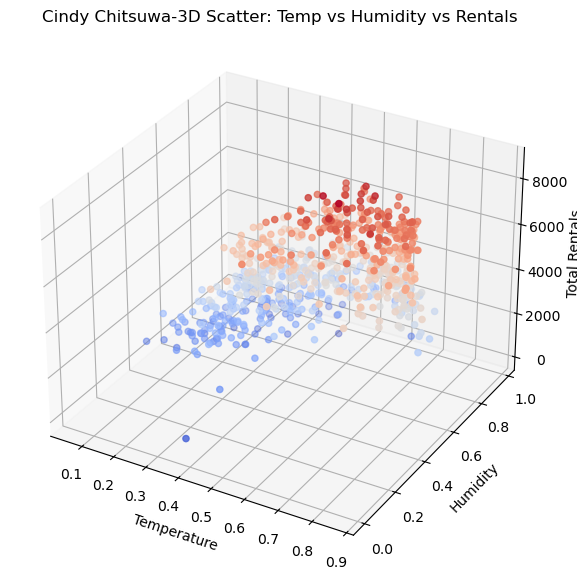

In [44]:
# create figure for 3d plot with a width of 10 and a height of 7
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d') # activate 3d plotting using projection 

ax.scatter(data['temp'], data['hum'], data['cnt'], # set the axis 
           c=data['cnt'], cmap='coolwarm')
# Label the axes
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Total Rentals')
ax.set_title('Cindy Chitsuwa-3D Scatter: Temp vs Humidity vs Rentals')

plt.savefig("CindyChitsuwa_3DScatter_TempHumidityRentals.png")

plt.show()


In this surface plot, I am showing the average number of bike rentals based on combinations of temperature and windspeed. The dataset is binned to create a smooth surface, with temperature on one axis, windspeed on another, and the average rental count forming the surface height.
The main takeaway is that rentals are highest when temperatures are moderate and windspeed is low. Extremely high windspeed or very cold temperatures correspond with lower average rentals.

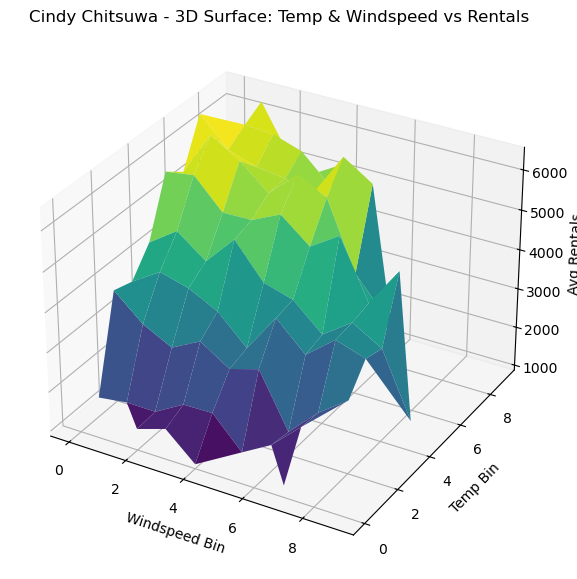

In [46]:
# Create temperature and windspeed bins to group the data into ranges
temp_bins = pd.cut(data['temp'], bins=10)
wind_bins = pd.cut(data['windspeed'], bins=10)

# Create a pivot table to calculate the average rental count for each temp-windspeed bin combination
pivot = data.pivot_table(index=temp_bins, columns=wind_bins, values='cnt', aggfunc='mean')

# Create indexes for the bins
x_vals = np.arange(len(pivot.columns))  # windspeed bins on x-axis
y_vals = np.arange(len(pivot.index))    # temperature bins on y-axis
x_grid, y_grid = np.meshgrid(x_vals, y_vals)  # create grid for surface plot
z_vals = pivot.to_numpy()  # average rental values for each grid cell

# create figure for 3D plot with a width of 10 and a height of 7
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # activate 3D plotting using projection

# Plot the 3D surface 
surf = ax.plot_surface(x_grid, y_grid, z_vals, cmap='viridis')

# Label the axes
ax.set_title("Cindy Chitsuwa - 3D Surface: Temp & Windspeed vs Rentals")
ax.set_xlabel("Windspeed Bin")
ax.set_ylabel("Temp Bin")
ax.set_zlabel("Avg Rentals")

plt.savefig("CindyChitsuwa_3DSurface_TempWindspeedRentals.png")

plt.show()

In this 3D bar plot, I am showing the average number of rentals for each combination of season and weekday. Season is on one axis, weekday on another, and the height of each bar represents the average rental count.
The main takeaway is that summer and fall seasons, especially on weekends, show higher average rentals, while winter weekdays have the lowest.

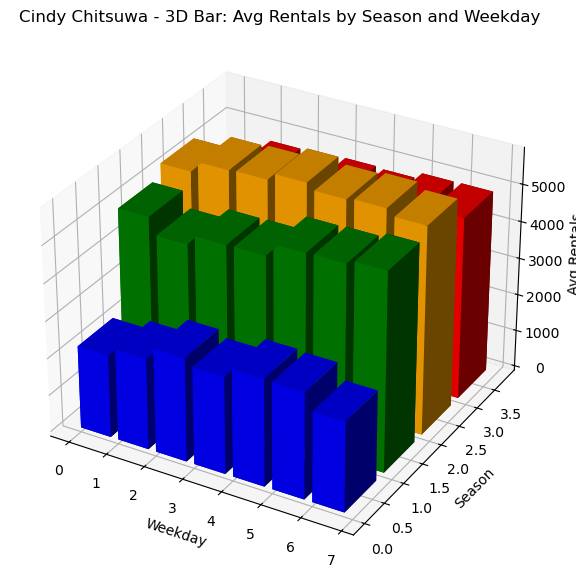

In [56]:
# Group the data by season and weekday, to calculate average rentals
grouped_data = data.groupby(['season', 'weekday'])['cnt'].mean().unstack()

# Get positions for the bars
num_weekdays = grouped_data.shape[1]
num_seasons = grouped_data.shape[0]

weekday_pos = np.arange(num_weekdays)  # x-axis: weekdays
season_pos = np.arange(num_seasons)    # y-axis: seasons

# Create a grid for all (season, weekday)
weekday_grid, season_grid = np.meshgrid(weekday_pos, season_pos)

# Flatten the grids into 1D arrays for plotting
x_pos = weekday_grid.ravel()
y_pos = season_grid.ravel()

# Heights of each bar based on average rentals
bar_heights = grouped_data.to_numpy().ravel()

# Set the bottom of all bars to 0
bottom = np.zeros_like(bar_heights)

# Set width and depth of each bar
bar_width = 0.8
bar_depth = 0.8

# create figure for 3D plot with a width of 10 and a height of 7
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # activate 3D plotting

# Assign colors to seasons using readable color names
season_colors = ['blue', 'green', 'orange', 'red']  # 1=Spring, 2=Summer, 3=Fall, 4=Winter
bar_colors = [season_colors[int(season)] for season in y_pos]  # color by season index

# Draw the 3D bars with assigned colors
ax.bar3d(x_pos, y_pos, bottom,
         bar_width, bar_depth, bar_heights,
         color=bar_colors, shade=True)

# Label the axes and set the title
ax.set_title('Cindy Chitsuwa - 3D Bar: Avg Rentals by Season and Weekday')
ax.set_xlabel('Weekday')
ax.set_ylabel('Season')
ax.set_zlabel('Avg Rentals')

# Save the figure
plt.savefig("CindyChitsuwa_3DBar_SeasonWeekdayRentals.png", dpi=300)

# Show the plot
plt.show()

In this 3D line plot, I am showing how temperature and total rentals vary over time. Each point along the line represents a specific day in the dataset, with the x-axis showing the day index, the y-axis showing temperature, and the z-axis showing total rentals.
The main takeaway is that there is a clear seasonal trend: as temperature increases over time, the number of rentals also tends to rise, with peaks occurring in warmer months.

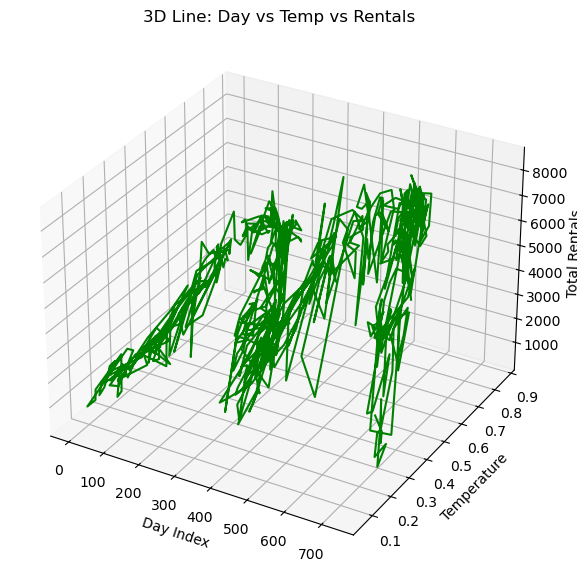

In [66]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(data['instant'], data['temp'], data['cnt'], color='green')

ax.set_title('3D Line: Day vs Temp vs Rentals')
ax.set_xlabel('Day Index')
ax.set_ylabel('Temperature')
ax.set_zlabel('Total Rentals')

plt.savefig("CindyChitsuwa_3DLine_DayTempRentals.png")

plt.show()

In this 3D bar plot, I am showing the average number of daily bike rentals for each month, separated by year. 
The x-axis represents the month (from January to December), the y-axis represents the year (2011 and 2012), and the z-axis shows the average number of rentals.

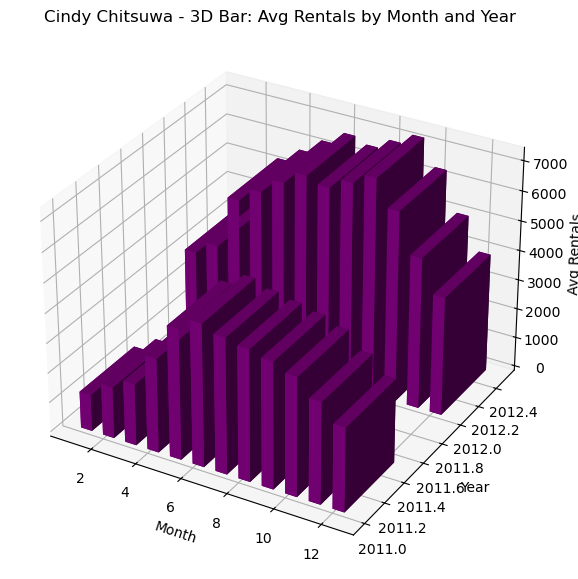

In [64]:
# Load the dataset
data = pd.read_csv("day.csv")

# Group the data by year and month, then calculate the average daily rental count
monthly_average_rentals = data.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()

# Extract axis values for plotting
months = monthly_average_rentals['mnth']                       # x-axis: months
years = monthly_average_rentals['yr'].replace({0: 2011, 1: 2012})  # y-axis: years 
average_rentals = monthly_average_rentals['cnt']               # z-axis: average rentals

# Set bar base and dimensions
bar_base = np.zeros_like(average_rentals)
bar_width = 0.5
bar_depth = 0.5

# Create figure for 3D plot 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # activate 3D plotting

# Draw 3D bars for each (month, year) 
ax.bar3d(months, years, bar_base,
         bar_width, bar_depth, average_rentals,
         color='purple', shade=True)

# Add labels and title
ax.set_title('Cindy Chitsuwa - 3D Bar: Avg Rentals by Month and Year')
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Avg Rentals')

# Save the plot as an image file
plt.savefig("CindyChitsuwa_3DBar_MonthlyTrends.png", dpi=300)

# Show the plot
plt.show()

These 3D plots helped me see patterns in the data more clearly. I noticed that rentals go up in warmer months and in 2012 compared to 2011. Weather, season, and time all play a big role. Adding a third dimension made the trends stand out more.